# RH API 101 examples

Import RestHub API library

In [2]:
from rhapi import RhApi

Import some additional well-known analytical packages

In [3]:
import numpy as np
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 5]

Lets initialize RH API object with service URL.\
More service URLs please lookup from here: https://twiki.cern.ch/twiki/bin/viewauth/CMS/ConstructionDB#List_of_CMS_Construction_databas

In [4]:
url = "http://dbloader-tracker:8113"
rh = RhApi(url, debug = False)

List folders, basically detector+database combination

## Basics

In [6]:
rh.folders()

['trker_cmsr', 'trker_int2r']

List folder tables.\
Tables, db structure and naming convention is described here: https://twiki.cern.ch/twiki/bin/viewauth/CMS/ConstructionDB#API_Tables

In [7]:
np.array(rh.tables('trker_int2r'))

array(['c1020', 'c12620', 'c13420', 'c13440', 'c13460', 'c13480',
       'c13500', 'c13520', 'c13540', 'c13560', 'c13820', 'c2260', 'c2720',
       'c2740', 'c2760', 'c2820', 'c2840', 'c2860', 'c3420', 'c3440',
       'c3800', 'c4600', 'c6220', 'c6240', 'c6260', 'c6280', 'c6300',
       'c6320', 'c6340', 'c6620', 'c7820', 'c7840', 'c7860', 'c8640',
       'c8660', 'c8680', 'c9020', 'cbc_test_results_v', 'conditions',
       'datasets', 'hybrid_test_metadata_v', 'kinds_of_part', 'p1000',
       'p10100', 'p10120', 'p10140', 'p10160', 'p10180', 'p10200',
       'p10220', 'p10240', 'p10260', 'p10280', 'p10300', 'p10320',
       'p10340', 'p10360', 'p10380', 'p1040', 'p10400', 'p1060', 'p10620',
       'p10640', 'p10660', 'p11020', 'p11420', 'p13020', 'p13040',
       'p13060', 'p1400', 'p1800', 'p1820', 'p2200', 'p2220', 'p2240',
       'p2280', 'p2300', 'p2320', 'p2340', 'p2360', 'p2380', 'p2600',
       'p2620', 'p2640', 'p2660', 'p2680', 'p2700', 'p3000', 'p4200',
       'p4620', 'p502

Single table metadata.

In [8]:
rh.table('trker_int2r','parts')

{'metadata': {'usage': 'Relates with: kinds_of_part, datasets and c[number]',
  'description': 'Parts from CONSTRUCT database',
  'Source': 'construct.xml'},
 'columns': [{'metadata': {'usage': 'Primary key, relates with parts.PART_PARENT_ID, datasets.PART_ID, c[number].PART_ID',
    'description': 'Unique indentifier of part'},
   'name': 'ID',
   'type': 'NUMBER'},
  {'metadata': {'usage': 'Foreign key, relates with parts.PART_ID',
    'description': 'Parent part identifier'},
   'name': 'PART_PARENT_ID',
   'type': 'NUMBER'},
  {'metadata': {'usage': 'Foreign Key, relates with kinds_of_part.ID',
    'description': 'Unique indentifier of kind of part'},
   'name': 'KIND_OF_PART_ID',
   'type': 'NUMBER'},
  {'metadata': {'description': 'Kind of part name'},
   'name': 'KIND_OF_PART',
   'type': 'STRING'},
  {'metadata': {'usage': 'Foreign key, relates with locations.id',
    'description': 'Location ID'},
   'name': 'LOCATION_ID',
   'type': 'NUMBER'},
  {'metadata': {'description': '

List table columns...

In [35]:
for c in rh.table('trker_int2r','parts')['columns']:
    print(f'{c["name"]}\t{c["type"]}')

ID	NUMBER
PART_PARENT_ID	NUMBER
KIND_OF_PART_ID	NUMBER
KIND_OF_PART	STRING
LOCATION_ID	NUMBER
MANUFACTURER	STRING
BARCODE	STRING
SERIAL_NUMBER	STRING
VERSION	STRING
NAME_LABEL	STRING
PRODUCTION_DATE	DATE
BATCH_NUMBER	STRING
DESCRIPTION	STRING


## Reading construction data

This is the structure of kind of parts table.

In [36]:
rh.table('trker_int2r','kinds_of_part')

{'metadata': {'usage': 'Relates with: parts, c[number]',
  'description': 'Kinds of part from CONSTRUCT database',
  'Source': 'construct.xml'},
 'columns': [{'metadata': {'usage': 'Primary key, relates with parts.KIND_OF_PART_ID, c[number].KIND_OF_PART_ID',
    'description': 'Unique indentifier of kind of part'},
   'name': 'ID',
   'type': 'NUMBER'},
  {'metadata': {'description': 'Table name to query parts data'},
   'name': 'PART_TABLE',
   'type': 'STRING'},
  {'metadata': {'description': 'Detector name'},
   'name': 'DETECTOR',
   'type': 'STRING'},
  {'metadata': {'description': 'Kind of part manufacturer name'},
   'name': 'MANUFACTURER',
   'type': 'STRING'},
  {'metadata': {'description': 'Kind of part name'},
   'name': 'NAME',
   'type': 'STRING'},
  {'metadata': {'description': 'Kind of part description'},
   'name': 'DESCRIPTION',
   'type': 'STRING'}],
 'connection': 'trker_int2r'}

List kinds of parts that have at least one entry.

In [40]:
kops = np.array(rh.json('select p.PART_TABLE, p.NAME from trker_int2r.kinds_of_part p')['data'])
for t, n in kops:
    qid = rh.qid(f'select * from trker_int2r.{t} c')
    c = rh.count(qid)
    if c > 0:
        print(t, '\t', rh.count(qid), '\t', n)

p5420 	 74985 	 CBC3 Readout Chip
p5020 	 6 	 CBC3 Wafer
p2280 	 4 	 Tracker Prototype 8CBC2 Hybrid
p5820 	 110 	 Nano Crate
p11020 	 25 	 Tracker Prototype PS Power Hybrid
p7420 	 19 	 AMC13
p1800 	 664 	 PS-s Sensor
p1040 	 19 	 Tracker Hamamatsu Sensor
p10400 	 1 	 PS-p Halfmoon SW
p10380 	 1 	 PS-p Halfmoon SE
p10360 	 2 	 PS-p Halfmoon NW
p10300 	 1 	 PS-p Halfmoon E
p1060 	 9 	 Tracker Hamamatsu Sensor Wafer
p2220 	 197 	 PS-s Wafer
p2200 	 180 	 2S Wafer
p1400 	 274 	 2S Sensor
p11420 	 2 	 zxc
p9420 	 1 	 2S Front-end Hybrid
p10620 	 6 	 2S Module
p2380 	 27 	 Tracker Prototype 2CBC3 Flex Stiffner
p4620 	 1 	 Tracker Prototype TB2S ProtoModule
p8220 	 1640629 	 8CBC3 Front-end Hybrid
p2600 	 184 	 Tracker Prototype 8CBC2 Flex
p4200 	 217 	 Tracker FC7 AMC Card
p13060 	 1045 	 1000Parts
p13040 	 500 	 500Parts
p13020 	 200 	 200Parts
p2300 	 25 	 Tracker Prototype 2CBC3 Hybrid
p2640 	 48 	 Tracker Prototype CBC2 Chip
p1000 	 1 	 Tracker Detector ROOT
p2360 	 25 	 Tracker Prototy

I.e. table for 2S Sensor parts is p1400\
Lets look into the table structure

In [41]:
for c in rh.table('trker_int2r','p1400')['columns']:
    print(f'{c["name"]}\t{c["type"]}')

ID	NUMBER
PART_PARENT_ID	NUMBER
KIND_OF_PART_ID	NUMBER
KIND_OF_PART	STRING
MANUFACTURER	STRING
BARCODE	STRING
SERIAL_NUMBER	STRING
VERSION	STRING
NAME_LABEL	STRING
PRODUCTION_DATE	DATE
BATCH_NUMBER	STRING
DESCRIPTION	STRING
ACONSTRUCTION_PHASE	STRING
ASENSOR_TYPE	STRING
ASTATUS	STRING
A2S_SENSOR_POSN	STRING


As you might see - columns ACONSTRUCTION_PHASE, ASENSOR_TYPE, ASTATUS, A2S_SENSOR_POSN are comming from the ATTRIBUTES tables.\
Lets look into the data though.

In [46]:
df = pd.read_csv(StringIO(rh.csv("select * from trker_int2r.p1400 p")), sep=",")
df

ID  PART_PARENT_ID  KIND_OF_PART_ID KIND_OF_PART       MANUFACTURER  \
0       2219          3459.0             1400    2S Sensor          Hamamatsu   
1       2218          3458.0             1400    2S Sensor          Hamamatsu   
2       2217          3457.0             1400    2S Sensor          Hamamatsu   
3       2216          3456.0             1400    2S Sensor          Hamamatsu   
4       2215          3455.0             1400    2S Sensor          Hamamatsu   
5       2214          3454.0             1400    2S Sensor          Hamamatsu   
6       2213          3453.0             1400    2S Sensor          Hamamatsu   
7       2212          3452.0             1400    2S Sensor          Hamamatsu   
8       2211          3451.0             1400    2S Sensor          Hamamatsu   
9       2210          3450.0             1400    2S Sensor          Hamamatsu   
10      2209          3449.0             1400    2S Sensor          Hamamatsu   
11      2208          3448.0             1400    2S Sensor          Hamamatsu   
12      2207          3447.0             1400    2S Sensor          Hamamatsu   
13      2206          3446.0             1400    2S Sensor          Hamamatsu   
14      2205          3445.0             1400    2S Sensor          Hamamatsu   
15      2204          3444.0             1400    2S Sensor          Hamamatsu   
16      2203          3443.0             1400    2S Sensor          Hamamatsu   
17      2202          3442.0             1400    2S Sensor          Hamamatsu   
18      2201          3441.0             1400    2S Sensor          Hamamatsu   
19      2200          3440.0             1400    2S Sensor          Hamamatsu   
20      2199          3439.0             1400    2S Sensor          Hamamatsu   
21      2198          3438.0             1400    2S Sensor          Hamamatsu   
22      2197          3437.0             1400    2S Sensor          Hamamatsu   
23      2196          3436.0             1400    2S Sensor          Hamamatsu   
24      2195          3435.0             1400    2S Sensor          Hamamatsu   
25      2194          3434.0             1400    2S Sensor          Hamamatsu   
26      2193          3433.0             1400    2S Sensor          Hamamatsu   
27      2192          3432.0             1400    2S Sensor          Hamamatsu   
28      2191          3431.0             1400    2S Sensor          Hamamatsu   
29      2190          3430.0             1400    2S Sensor          Hamamatsu   
..       ...             ...              ...          ...                ...   
124     5396          4996.0             1400    2S Sensor          Hamamatsu   
125     5395          4995.0             1400    2S Sensor          Hamamatsu   
126     5394          4994.0             1400    2S Sensor          Hamamatsu   
127     5393          4993.0             1400    2S Sensor          Hamamatsu   
128     5392          4992.0             1400    2S Sensor          Hamamatsu   
129     5391          4991.0             1400    2S Sensor          Hamamatsu   
130     5390          4990.0             1400    2S Sensor          Hamamatsu   
131     5389          4989.0             1400    2S Sensor          Hamamatsu   
132     5388          4988.0             1400    2S Sensor          Hamamatsu   
133     5387          4987.0             1400    2S Sensor          Hamamatsu   
134     5386          4986.0             1400    2S Sensor          Hamamatsu   
135     5385          4985.0             1400    2S Sensor          Hamamatsu   
136     5384          4984.0             1400    2S Sensor          Hamamatsu   
137     5383          4983.0             1400    2S Sensor          Hamamatsu   
138     5382          4982.0             1400    2S Sensor          Hamamatsu   
139     5381          4981.0             1400    2S Sensor          Hamamatsu   
140     5380          4980.0             1400    2S Sensor          Hamamatsu   
141  1761880       1761900.0             

Now lets select only BOTTOM sensors...

In [47]:
df = pd.read_csv(StringIO(rh.csv("select * from trker_int2r.p1400 p where p.A2S_SENSOR_POSN = 'BOTTOM'")), sep=",")
df

ID  PART_PARENT_ID  KIND_OF_PART_ID KIND_OF_PART MANUFACTURER BARCODE  \
0  1761960         1761540             1400    2S Sensor          NaN  sens04   
1  1761880         1761900             1400    2S Sensor          NaN  sens02   
2     2186            2680             1400    2S Sensor    Hamamatsu     NaN   
3     3793            3480             1400    2S Sensor    Hamamatsu     NaN   

                    SERIAL_NUMBER  VERSION  \
0                          sens04      NaN   
1                          sens02      NaN   
2              SEN2SXX1VPX1859212      NaN   
3  ARTIOM_TEST_SEN2SXX1VPX1859212      NaN   

                           NAME_LABEL  PRODUCTION_DATE  BATCH_NUMBER  \
0                              sens04              NaN           NaN   
1                              sens02              NaN           NaN   
2              HPK_SNSR_2S_VPX1859212              NaN           NaN   
3  ARTIOM_TEST_HPK_SNSR_2S_VPX1859212              NaN           NaN   

          DESCRIPTION    ACONSTRUCTION_PHASE ASENSOR_TYPE  ASTATUS  \
0                 NaN  Prepared for assembly          NaN      NaN   
1                 NaN  Prepared for assembly          NaN      NaN   
2  P-Stop ddFZ 240um                     NaN      2SProto      NaN   
3  P-Stop ddFZ 240um                     NaN      2SProto      NaN   

  A2S_SENSOR_POSN  
0          BOTTOM  
1          BOTTOM  
2          BOTTOM  
3          BOTTOM

## Finding out about condition data

List all conditions and count number of rows

In [8]:
conditions = np.array(rh.json('select * from trker_int2r.conditions c')['data'])
for n, t in conditions[:, 1:3]:
    qid = rh.qid(f'select * from trker_int2r.{t} c')
    print(t, '\t', n, '\t', rh.count(qid))

c2720 	 Tracker Sensor Tracking Data 	 18
c2740 	 Tracker Hybrid Tracking Data 	 3
c2760 	 Tracker Module Tracking Data 	 0
c3440 	 Tracker Shipment Items 	 0
c8640 	 Tracker Hybrids Results Metadata 	 1
c8660 	 Tracker Hybrids Test Results 	 26
c8680 	 Tracker CBC Test Results 	 3
c6620 	 Tracker Component Grading 	 0
c2820 	 Tracker Readout Board Tracking Data 	 0
c2840 	 Tracker Component Purchase Data 	 309
c2860 	 Tracker Component Cost Data 	 54
c13420 	 Tracker Halfmoon IV Test 	 0
c13440 	 Tracker Halfmoon CV Test 	 0
c13460 	 Tracker Halfmoon Diode CV Test 	 0
c13480 	 Tracker Halfmoon TC Test 	 0
c13500 	 Tracker Halfmoon IGV Test 	 0
c13520 	 Tracker Halfmoon Mask Misalignment 	 0
c13540 	 Tracker Halfmoon Mask Parameneters 	 0
c13560 	 Tracker Halfmoon Metadata 	 0
c2260 	 Tracker Sensor Initial Tests 	 40
c1020 	 Tracker Strip-Sensor IV Test 	 7275
c4600 	 Tracker Strip-Sensor CV Test 	 5863
c3420 	 Tracker Requests 	 0
c3800 	 Tracker Shipments 	 0
c7820 	 Tracker Compone

Lets take 'Tracker Sensor Initial Tests' for example... Table name is c1020 (first column above).\
Reading data structure of 'Tracker Strip-Sensor IV Test' data = c1020

In [10]:
for c in rh.table('trker_int2r','c1020')['columns']:
    print(f'{c["name"]}\t{c["type"]}')

ID	NUMBER
KIND_OF_CONDITION_ID	NUMBER
KIND_OF_CONDITION	STRING
CONDITION_DATA_SET_ID	NUMBER
CHANNEL_ID	NUMBER
KIND_OF_PART_ID	NUMBER
KIND_OF_PART	STRING
PART_ID	NUMBER
PART_BARCODE	STRING
PART_SERIAL_NUMBER	STRING
PART_NAME_LABEL	STRING
VOLTS	NUMBER
CURRNT_NAMP	NUMBER
TEMP_DEGC	NUMBER
RH_PRCNT	NUMBER
BIASCURRNT_NAMPR	NUMBER
TIME	DATE
AIR_TEMP_DEGC	NUMBER


Read all unique part serial numbers that have this type of data (condition)...\
And put it into Pandas DataFrame for convienience...

In [9]:
df = pd.read_csv(StringIO(rh.csv("select c.PART_ID, c.PART_SERIAL_NUMBER from trker_int2r.c1020 c group by c.PART_ID, c.PART_NAME_LABEL, c.PART_SERIAL_NUMBER")), sep=",")
df

PART_ID               PART_SERIAL_NUMBER
0       1400                  VPX2177911_SNSR
1       5400             HPK_VPX28441_1030_2S
2       1402                  VPX2177912_SNSR
3       1404                  VPX2177914_SNSR
4       1406                  VPX2177915_SNSR
5       1408                  VPX2177916_SNSR
6       1410                  VPX2177918_SNSR
7       1412                  VPX2177919_SNSR
8       1414                  VPX2177921_SNSR
9       1416                  VPX2177923_SNSR
10      5380             HPK_VPX28441_1002_2S
11      5381             HPK_VPX28441_1003_2S
12      5382             HPK_VPX28441_1004_2S
13      5383             HPK_VPX28441_1005_2S
14      5384             HPK_VPX28441_1007_2S
15      5385             HPK_VPX28441_1010_2S
16      5386             HPK_VPX28441_1011_2S
17      5387             HPK_VPX28441_1012_2S
18      5388             HPK_VPX28441_1013_2S
19      5389             HPK_VPX28441_1014_2S
20      5390             HPK_VPX28441_1015_2S
21      5391             HPK_VPX28441_1019_2S
22      5392             HPK_VPX28441_1020_2S
23      5393             HPK_VPX28441_1021_2S
24      5394             HPK_VPX28441_1022_2S
25      5395             HPK_VPX28441_1024_2S
26      5396             HPK_VPX28441_1025_2S
27      5397             HPK_VPX28441_1026_2S
28      5398             HPK_VPX28441_1027_2S
29      5399             HPK_VPX28441_1029_2S
..       ...                              ...
87     14996              33234-020_PSS_MAINA
88     14997              33234-021_PSS_MAINA
89     14998              33234-022_PSS_MAINA
90     14999              33234-023_PSS_MAINA
91     15001              33234-026_PSS_MAINA
92     15002              33234-027_PSS_MAINA
93     15003              33234-028_PSS_MAINA
94     15004              33234-029_PSS_MAINA
95     15005              33234-030_PSS_MAINA
96     15006              33234-031_PSS_MAINA
97     15007              33234-032_PSS_MAINA
98     15008              33234-033_PSS_MAINA
99     15009              33234-034_PSS_MAINA
100    15010              33234-035_PSS_MAINA
101    15011              33234-036_PSS_MAINA
102    15012              33234-037_PSS_MAINA
103    15013              33234-038_PSS_MAINA
104    15014              33234-039_PSS_MAINA
105    15015              33234-040_PSS_MAINA
106    15016              33234-041_PSS_MAINA
107    15017              33234-042_PSS_MAINA
108    15018              33234-043_PSS_MAINA
109  1759960  |0000|0000|0000|0000|0001|0111|
110  1760001  |1001|0000|0000|0000|0001|0111|
111  1760260  |0000|0000|0000|0000|0001|0111|
112  1761420                           sens01
113  1761580                        live_demo
114  1761880                           sens02
115  1761940                           sens03
116  1761960                           sens04

[117 rows x 2 columns]

Lets read IV data for sensor SN = 'VPX2177911_SNSR' (ID = 1400)\

In [10]:
part_id = 1400 # SN = VPX2177911_SNSR
df = pd.read_csv(StringIO(rh.csv("select c.VOLTS, c.CURRNT_NAMP from trker_int2r.c1020 c where c.PART_ID = :a order by c.VOLTS", {'a': part_id})), sep=",")
df

VOLTS   CURRNT_NAMP
0    -500 -1.164371e-08
1    -480 -1.155218e-08
2    -460 -1.145833e-08
3    -440 -1.135244e-08
4    -420 -1.127931e-08
5    -400 -1.122096e-08
6    -380 -1.114350e-08
7    -360 -1.106122e-08
8    -340 -1.095165e-08
9    -320 -1.084054e-08
10   -300 -1.076245e-08
11   -280 -1.066339e-08
12   -260 -1.054786e-08
13   -240 -1.041554e-08
14   -220 -1.021972e-08
15   -200 -1.003028e-08
16   -180 -9.787322e-09
17   -160 -9.500110e-09
18   -140 -9.120241e-09
19   -120 -8.681107e-09
20   -100 -8.192383e-09
21    -80 -7.699901e-09
22    -60 -7.142998e-09
23    -40 -6.397574e-09
24    -20 -5.034035e-09
25      0  1.218511e-08

Lets plot AMPS vs VOLTS now

In [11]:
_ = df.plot.line(x = 'VOLTS')

And a histogram of AMPS please

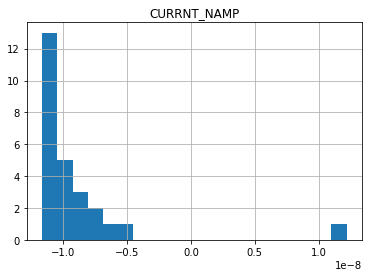

In [12]:
_ = df.hist('CURRNT_NAMP', bins = 20)